In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

pathlib.Path()
pathlib.Path().absolute()
# pathlib.Path('pythontutorial.py').absolute()

PosixPath('/Users/adrianstroth/Documents/Uni/HU Berlin/Computational Physics 2/Project 3 - Time-dependet Schroedinger Equation/TDSE/scripts')

## Stuff to do with data and pandas

In [2]:
df = pd.read_csv("../data/gauss_wf_wall6_129_1_10_1_3_30_6_1.txt", sep="\t")
df.shape
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tau               1290 non-null   float64
 1   REAL(psi[n])      1290 non-null   float64
 2   IMAG(psi[n])      1290 non-null   float64
 3   averx             1290 non-null   float64
 4   deltax            1290 non-null   float64
 5   averp             1290 non-null   float64
 6   deltap            1290 non-null   float64
 7   avg_state_energy  1290 non-null   float64
 8   norm(psi)         1290 non-null   float64
dtypes: float64(9)
memory usage: 90.8 KB


,tau,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi)
count,1290.00000,1.290000e+03,1.290000e+03,1290.000000,1290.000000,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03
mean,0.45000,5.333038e-07,2.249154e-06,30.586731,6.000130,8.385542e-01,4.505810e-02,1.963128e-01,1.000000e+00
std,0.28734,6.228143e-02,6.228142e-02,0.526324,0.000189,2.496805e-08,6.942598e-08,1.876972e-15,6.882469e-16
min,0.00000,-2.487102e-01,-2.576028e-01,30.000006,5.999985,8.385542e-01,4.505800e-02,1.963128e-01,1.000000e+00
25%,0.20000,-2.132515e-05,-2.030760e-05,30.106968,5.999988,8.385542e-01,4.505808e-02,1.963128e-01,1.000000e+00
50%,0.45000,0.000000e+00,2.237901e-18,30.445238,6.000035,8.385542e-01,4.505810e-02,1.963128e-01,1.000000e+00
75%,0.70000,7.894907e-05,7.656923e-05,30.995836,6.000217,8.385543e-01,4.505812e-02,1.963128e-01,1.000000e+00
max,0.90000,2.559028e-01,2.456356e-01,31.597745,6.000571,8.385543e-01,4.505827e-02,1.963128e-01,1.000000e+00


## Recovering the same data from multiple data files

In [4]:
# trying to make a function that doesnt work for some reason
real = []
imag = np.empty([0])
avgx = np.empty([0])
deltax = np.empty([0])
avgp = np.empty([0])
deltap = np.empty([0])
avge = np.empty([0])


def get_obs(dframe):
    np.append(real,dframe.iloc[-1,1])
    np.append(imag,dframe.iloc[-1,2])
    np.append(avgx,dframe.iloc[-1,3])
    np.append(deltax,dframe.iloc[-1,4])
    np.append(avgp,dframe.iloc[-1,5])
    np.append(deltap,dframe.iloc[-1,6])
    np.append(avge,dframe.iloc[-1,7])

In [41]:
nsteps = [10, 20, 50, 100, 200, 1000]
count = False

for i in nsteps:
    df = pd.read_csv("../data/gauss_wf_wall6_129_1_{}_1_3_30_6_1.txt".format(i), sep="\t")

    temp_df = pd.DataFrame(df.iloc[[-1]])
    temp_df['nsteps'] = i
   # print(temp_df)
    if count == False:
        obs_df = pd.DataFrame(temp_df)
        print("count {}".format(count))
        count = True
        print("BNLUBKLUB")

    #    print(obs_df)
    else:
        obs_df = pd.concat([obs_df, temp_df], ignore_index=True)
        
        print("count {}".format(count))
        

    
#temp_df
obs_df['Tau'] = 1/obs_df['nsteps']
obs_df

count False
BNLUBKLUB
count True
count True
count True
count True
count True


,tau,REAL(psi[n]),IMAG(psi[n]),averx,deltax,averp,deltap,avg_state_energy,norm(psi),nsteps,Tau
0,0.900,5.425198e-16,-1.082073e-16,31.597745,6.000571,0.838554,0.045058,0.196313,1.0,10,0.100
1,0.950,1.078489e-16,-5.101518e-16,33.372174,6.002585,0.838554,0.045059,0.196313,1.0,20,0.050
2,0.980,-2.380285e-15,1.030182e-15,38.695348,6.017179,0.838548,0.045155,0.196313,1.0,50,0.020
3,0.990,1.175699e-15,-2.208666e-16,47.562434,6.055196,0.836170,0.073813,0.196313,1.0,100,0.010
4,0.995,2.505613e-11,2.586468e-11,60.957287,3.781553,0.069921,0.808003,0.196313,1.0,200,0.005
5,0.999,-6.347244e-05,-2.249713e-05,55.307248,7.740986,-0.438665,0.701213,0.196313,1.0,1000,0.001


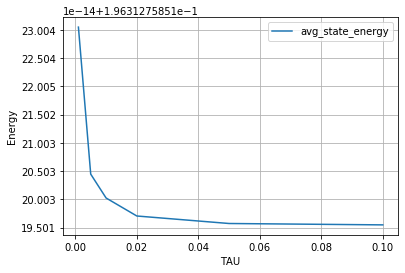

In [44]:
obs_df.plot(x='Tau', y='avg_state_energy', grid=True)
plt.xlabel("TAU")
plt.ylabel("Energy")
plt.show()